In [9]:
from skimage.io import imread
import czifile
from pathlib import Path
import numpy as np
from tnia.plotting.projections import show_xy_zy_slice_center

parent_path = r'D:\images\tnia-python-images\imagesc\2025_05_20_3D_Segmentation'
image_name = 'Image 6_Subset-pos02_t36-72.czi'

image = czifile.imread(Path(parent_path) / image_name)
image = np.squeeze(image)

print(type(image), print(image.shape), print(image.dtype), print(image.min()), print(image.max()))



(3, 38, 44, 1024, 1024)
uint8
0
255
<class 'numpy.ndarray'> None None None None


<class 'numpy.ndarray'> (44, 1024, 1024) uint8 0 255
<class 'numpy.ndarray'> (44, 1024, 1024) uint8 0 255


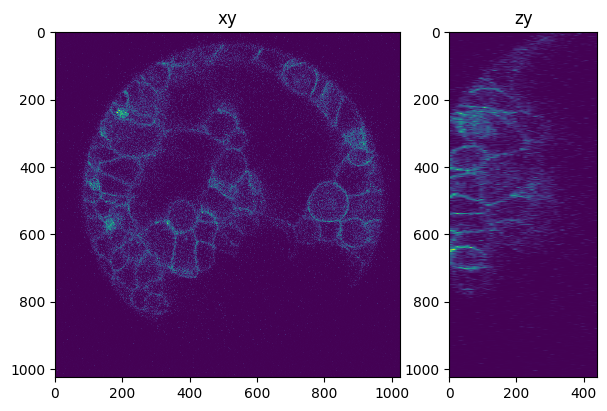

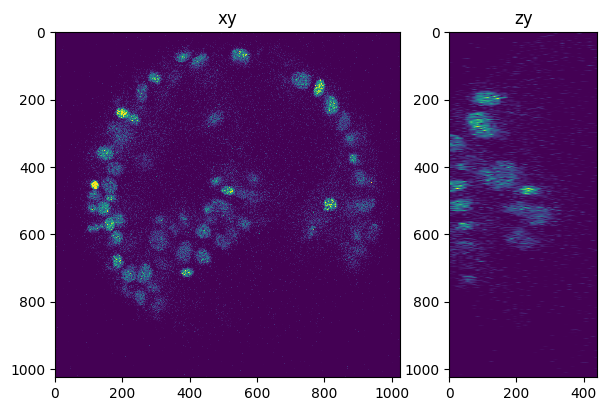

In [16]:
stack1 = image[0,0,:,:,:]
stack2 = image[1,0,:,:,:]

print(type(stack1), stack1.shape, stack1.dtype, stack1.min(), stack1.max())
fig = show_xy_zy_slice_center(stack1, sxy=1, sz=10, figsize=(7,7))

print(type(stack2), stack2.shape, stack2.dtype, stack2.min(), stack2.max())
fig = show_xy_zy_slice_center(stack2, sxy=1, sz=10, figsize=(7,7))

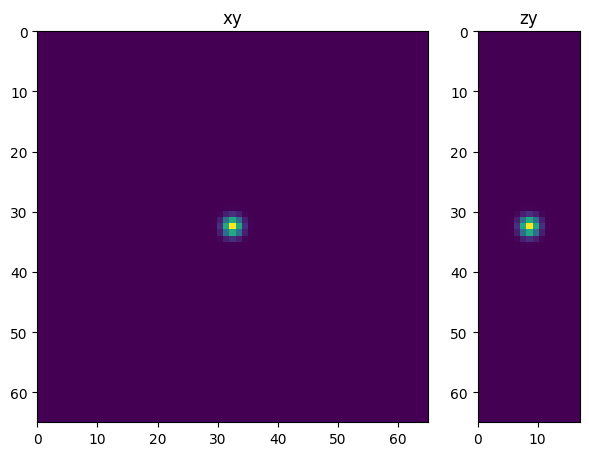

In [23]:
from tnia.deconvolution.gaussian_psf import gaussian_3d

psf = gaussian_3d(65, 17, 1, 1)

fig = show_xy_zy_slice_center(psf, sxy=1, sz=1, figsize=(7,7))

sdeconv 1.x.x detected
sdeconv 1.x.x detected


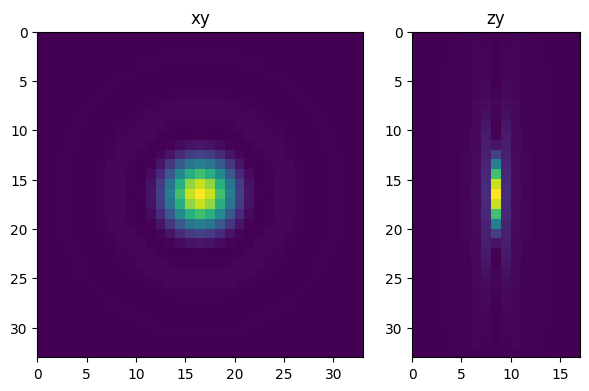

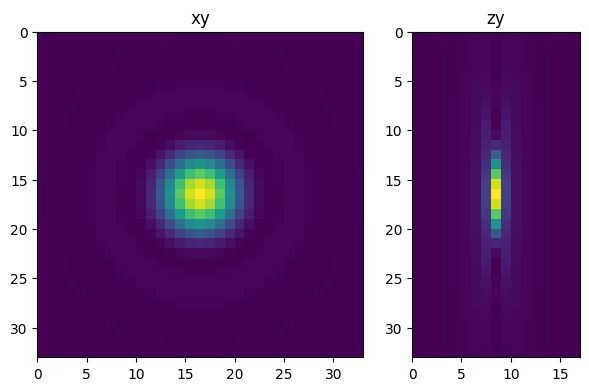

In [45]:
from tnia.deconvolution.psfs import gibson_lanni_3D, recenter_psf_axial

xy_voxel_size = 0.15/3
z_voxel_size = 1.5/3 

xy_psf_dim=33
z_psf_dim=17

NA=1.5

# ni is the refractive index of the immersion medium of the lens
ni=1
# ns is the refractive index of the sample
ns=1.33

use_psfm = False

wave1 = 530 
wave2 = 590

psf1= gibson_lanni_3D(NA, ni, ns, xy_voxel_size, z_voxel_size, xy_psf_dim, z_psf_dim, 0, wave1/1000., False, use_psfm)
psf2= gibson_lanni_3D(NA, ni, ns, xy_voxel_size, z_voxel_size, xy_psf_dim, z_psf_dim, 0, wave2/1000., False, use_psfm)

psf1 = psf1.astype(np.float32)
psf2 = psf2.astype(np.float32)

fig = show_xy_zy_slice_center(psf1, sxy=1, sz=1, figsize=(7,7))
fig = show_xy_zy_slice_center(psf2, sxy=1, sz=1, figsize=(7,7))

In [46]:
from tnia.deconvolution.richardson_lucy_gradient_consensus_latest import rlgc_latest
from timeit import default_timer as timer

decon1 = rlgc_latest(stack1, psf1)
decon2 = rlgc_latest(stack2, psf2)

Split time: 0.02688 s.
Convolution time: 0.00085 s.
KLD time: 0.41742 s.
H^T ratio time: 0.00122 s.
Update time: 0.00022 s.
Iteration 001 completed in 0.448 s. KLDs = 3.9729 (image), 5.0514 (split 1), 5.0517 (split 2). Update range: 0.07 to 24.83. Largest relative delta = 0.95972.

Split time: 0.03024 s.
Convolution time: 0.00028 s.
KLD time: 0.11846 s.
H^T ratio time: 0.00094 s.
Update time: 0.00024 s.
Iteration 002 completed in 0.151 s. KLDs = 1.3208 (image), 1.8177 (split 1), 1.8184 (split 2). Update range: 0.22 to 1.98. Largest relative delta = 0.39652.

Split time: 0.03058 s.
Convolution time: 0.00030 s.
KLD time: 0.11991 s.
H^T ratio time: 0.00090 s.
Update time: 0.00022 s.
Iteration 003 completed in 0.153 s. KLDs = 1.1089 (image), 1.5436 (split 1), 1.5443 (split 2). Update range: 0.30 to 1.58. Largest relative delta = 0.20714.

Split time: 0.03178 s.
Convolution time: 0.00048 s.
KLD time: 0.12094 s.
H^T ratio time: 0.00089 s.
Update time: 0.00024 s.
Iteration 004 completed in 0.

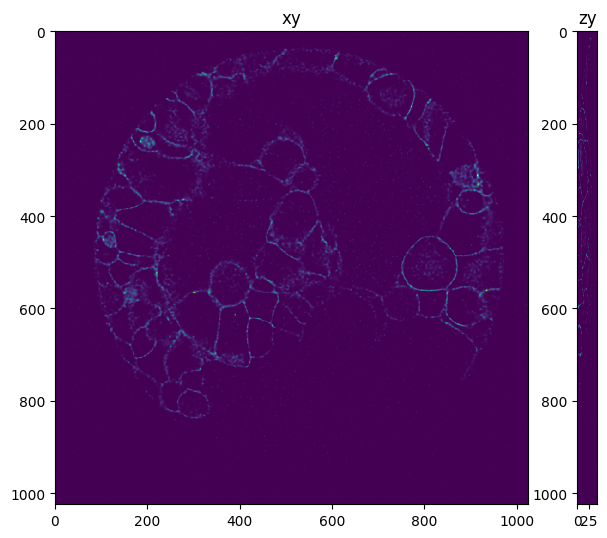

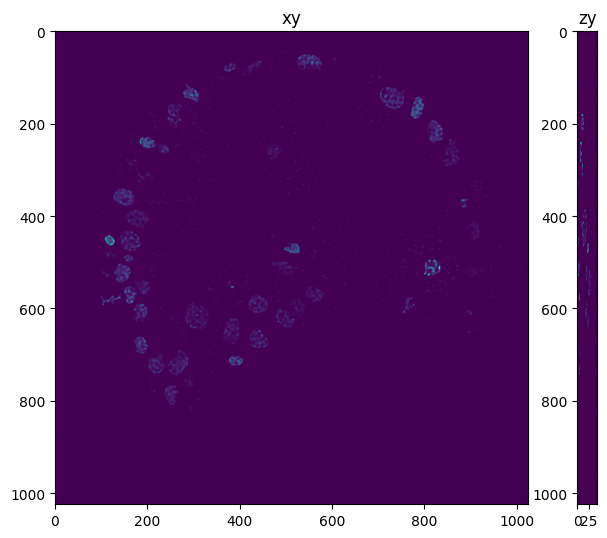

In [47]:
fig = show_xy_zy_slice_center(decon1, sxy=1, sz=1, figsize=(7,7))
fig = show_xy_zy_slice_center(decon2, sxy=1, sz=1, figsize=(7,7))

In [48]:
import napari

viewer = napari.Viewer()

viewer.add_image(stack1, name='stack1')
viewer.add_image(stack2, name='stack2')
viewer.add_image(decon1, name='decon1')
viewer.add_image(decon2, name='decon2')

<Image layer 'decon2' at 0x20ea42367d0>

get lib
get lib


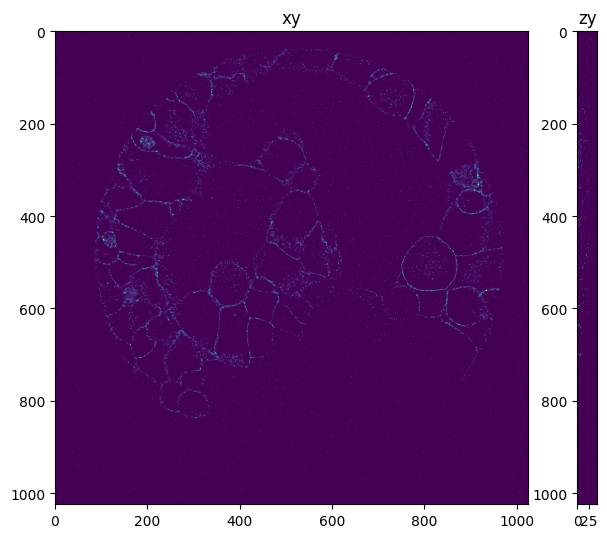

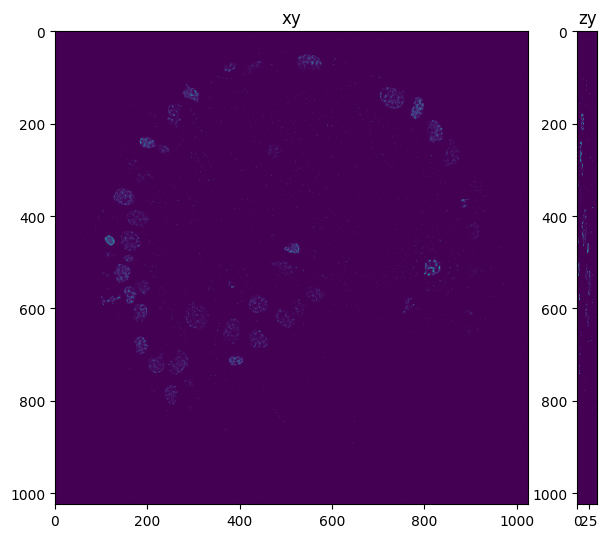

In [56]:
from clij2fft.richardson_lucy import richardson_lucy_nc, richardson_lucy

decon1_clij = richardson_lucy(stack1, psf1, numiterations=100)#, regularizationfactor=0.01)
decon2_clij = richardson_lucy(stack2, psf2, numiterations=100)#, regularizationfactor=0.01)

fig = show_xy_zy_slice_center(decon1_clij, sxy=1, sz=1, figsize=(7,7))
fig = show_xy_zy_slice_center(decon2_clij, sxy=1, sz=1, figsize=(7,7))

In [53]:
import napari
viewer = napari.Viewer()
viewer.add_image(stack1, name='stack1', scale=[10, 1, 1])
viewer.add_image(stack2, name='stack2', scale=[10, 1, 1])
viewer.add_image(decon1_clij, name='decon1_clij', scale=[10, 1, 1])
viewer.add_image(decon2_clij, name='decon2_clij',  scale=[10, 1, 1])

<Image layer 'decon2_clij' at 0x20ea9310fd0>

Split time: 0.02743 s.
Convolution time: 0.00131 s.
KLD time: 0.43825 s.
H^T ratio time: 0.00139 s.
Update time: 0.00051 s.
Iteration 001 completed in 0.470 s. KLDs = 3.9729 (image), 5.0514 (split 1), 5.0517 (split 2). Update range: 0.07 to 24.88. Largest relative delta = 0.95981.

Split time: 0.02994 s.
Convolution time: 0.00031 s.
KLD time: 0.11041 s.
H^T ratio time: 0.00086 s.
Update time: 0.00021 s.
Iteration 002 completed in 0.142 s. KLDs = 1.3094 (image), 1.8045 (split 1), 1.8051 (split 2). Update range: 0.21 to 3.80. Largest relative delta = 0.39116.

Split time: 0.03222 s.
Convolution time: 0.00072 s.
KLD time: 0.10266 s.
H^T ratio time: 0.00096 s.
Update time: 0.00023 s.
Iteration 003 completed in 0.137 s. KLDs = 1.0925 (image), 1.5251 (split 1), 1.5258 (split 2). Update range: 0.29 to 2.66. Largest relative delta = 0.28417.

Split time: 0.02936 s.
Convolution time: 0.00025 s.
KLD time: 0.10658 s.
H^T ratio time: 0.00143 s.
Update time: 0.00022 s.
Iteration 004 completed in 0.

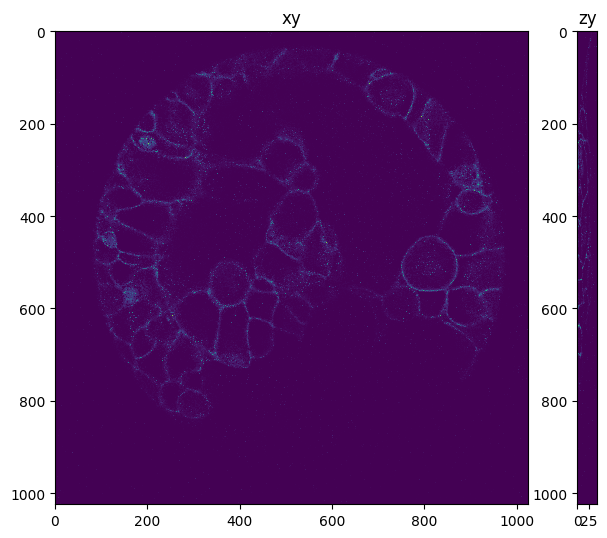

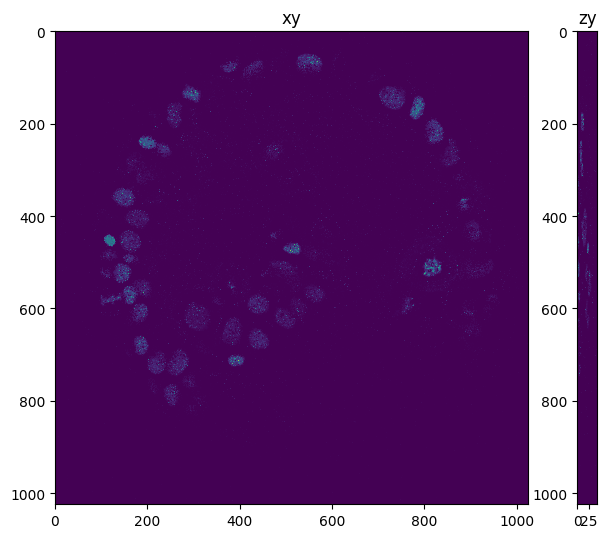

In [43]:
from tnia.deconvolution.richardson_lucy_gradient_consensus_latest_sandbox import rlgc_latest

decon1_md = rlgc_latest(stack1, psf1, 50, max_disagreements=0)[0]
decon2_md = rlgc_latest(stack2, psf2, 50, max_disagreements=0)[0]

fig = show_xy_zy_slice_center(decon1_md, sxy=1, sz=1, figsize=(7,7))
fig = show_xy_zy_slice_center(decon2_md, sxy=1, sz=1, figsize=(7,7))

In [44]:
viewer = napari.Viewer()

viewer.add_image(stack1, name='stack1', scale=[10, 1, 1])
viewer.add_image(stack2, name='stack2', scale=[10, 1, 1])
viewer.add_image(decon1_md, name='decon1_md', scale=[10, 1, 1])
viewer.add_image(decon2_md, name='decon2_md', scale=[10, 1, 1])

<Image layer 'decon2_md' at 0x20ea12c7dd0>